<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/03_neural_networks/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron: Building Block of Neural Networks

The **Perceptron** is the simplest type of neural network—a binary classifier that makes predictions based on a linear combination of input features.

In this notebook, you will:
- Understand how a perceptron works
- Manually implement a perceptron from scratch
- Train it on linearly separable data
- Visualize decision boundaries

### **Import Required Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### **Generate Linearly Separable Data**

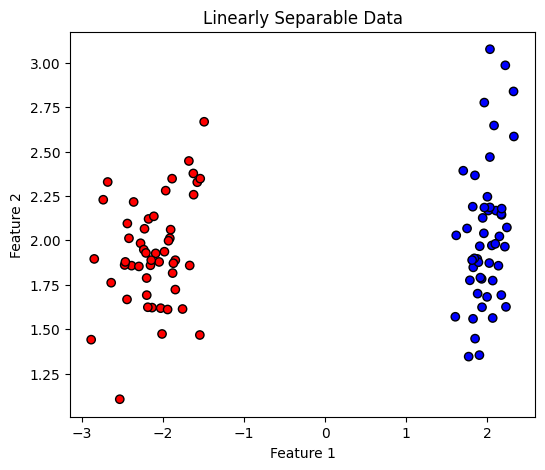

In [2]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=2.0,
    random_state=1
)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### **Perceptron Formula**

A perceptron performs:

    output = f(w·x + b)

Where:
- **x** = input vector
- **w** = weight vector
- **b** = bias
- **f** = activation function (step function)

The output is:
- 1 if weighted sum ≥ 0
- 0 otherwise


### **Manual Perceptron (From Scratch)**

In [3]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step
        self.weights = None
        self.bias = None

    def _unit_step(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

### **Train & Evaluate Manual Perceptron**

In [4]:
perceptron = SimplePerceptron(learning_rate=0.1, n_iters=10)
perceptron.fit(X, y)
predictions = perceptron.predict(X)

acc = accuracy_score(y, predictions)
print("Accuracy:", acc)

Accuracy: 1.0


### **Plot Decision Boundary**

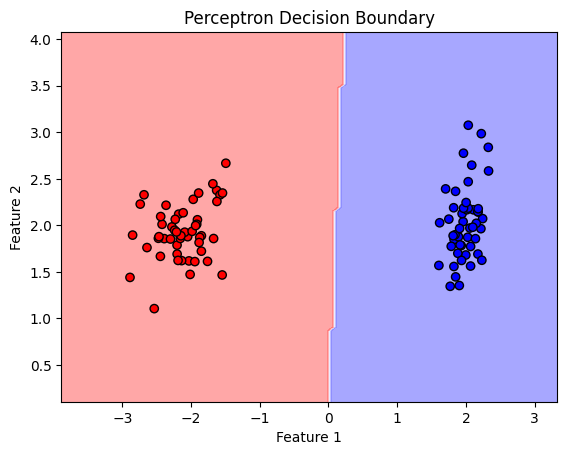

In [5]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, perceptron)

### **Bonus: Use scikit-learn Perceptron**

In [6]:
clf = Perceptron()
clf.fit(X, y)
print("scikit-learn Perceptron Accuracy:", clf.score(X, y))

scikit-learn Perceptron Accuracy: 1.0


### **Limitations**
- Only works on **linearly separable** data
- Cannot solve problems like XOR
- Step function activation limits learning

> These are overcome in multi-layer perceptrons (MLPs), which we will cover next.


### **Summary**
- You learned how a single-layer perceptron works
- Implemented it manually and with scikit-learn
- Visualized how it separates classes with a linear boundary

**Next:** Try the `deep_learning_intro.ipynb` to perfect Neural Network.

